# Project: Wrangling and Analyze Data

## WeRateDogs

![](dog-rates-social.jpg)

### Introduction

This project involves the wrangling, analyzing, and visualizing of datasets associated with the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). From the documentation given, WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 with over 4 million followers and ample international media coverage. The datasets used in this project will be gathered from various sources, assessed, cleaned, and insights will be drawn from them.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing dependencies
import pandas as pd
import requests

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', "wb") as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [214]:
# Not my code, but twitter issues
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [4]:
json_list = []
with open('tweet-json.txt', 'r') as file:
    for x in twitter_archive['tweet_id'].values:
        json_list.append(file.readline())

In [5]:
# Courtsey of @davidakingbeni
import json

pd_list = []
len_ = len(json_list)
for i in range(0, len_):
    if not json_list[i]:
        continue
    else:
        json_load = json.loads(json_list[i])
        tweet_id = json_load["id_str"]
        time = json_load["created_at"]
        likes = json_load["favorite_count"]
        retweet_counts = json_load["retweet_count"]
        json_dict = {"tweet_id": tweet_id,
                    "timestamp": time,
                    "likes": likes,
                    "retweet_count": retweet_counts}
    pd_list.append(json_dict)

In [6]:
extra_info = pd.DataFrame(pd_list)

In [7]:
extra_info.head()

,likes,retweet_count,timestamp,tweet_id
0,39467,8853,Tue Aug 01 16:23:56 +0000 2017,892420643555336193
1,33819,6514,Tue Aug 01 00:17:27 +0000 2017,892177421306343426
2,25461,4328,Mon Jul 31 00:18:03 +0000 2017,891815181378084864
3,42908,8964,Sun Jul 30 15:58:51 +0000 2017,891689557279858688
4,41048,9774,Sat Jul 29 16:00:24 +0000 2017,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [10]:
extra_info.isnull().sum()

likes            0
retweet_count    0
timestamp        0
tweet_id         0
dtype: int64

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
likes            2354 non-null int64
retweet_count    2354 non-null int64
timestamp        2354 non-null object
tweet_id         2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


In [14]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
extra_info.head()

,likes,retweet_count,timestamp,tweet_id
0,39467,8853,Tue Aug 01 16:23:56 +0000 2017,892420643555336193
1,33819,6514,Tue Aug 01 00:17:27 +0000 2017,892177421306343426
2,25461,4328,Mon Jul 31 00:18:03 +0000 2017,891815181378084864
3,42908,8964,Sun Jul 30 15:58:51 +0000 2017,891689557279858688
4,41048,9774,Sat Jul 29 16:00:24 +0000 2017,891327558926688256


In [15]:
twitter_archive.duplicated().sum()

0

In [16]:
image_predictions.duplicated().sum()

0

In [17]:
extra_info.duplicated().sum()

0

Thus far, no duplicates in all of the inspected datasets which spells good for the overall wrangling process.

In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
extra_info.dtypes

likes             int64
retweet_count     int64
timestamp        object
tweet_id         object
dtype: object

In [21]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [22]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
extra_info.describe()

,likes,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [24]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


### Quality issues
1. Retweets have to be removed.

2. All relevant variables in datasets should have the correct data type.

3. Twitter archives dataset contains columns with missing data.

4. "expanded_urls" column had missing values which can be generated.

5. There were quite a few names registered as "none".

6. There are entries with numerators which are not reasonable.

7. Entries with inconsistent denominators also exist.

8. Less relevant variables have to be removed.

### Tidiness issues
1. The various dog categories can be collapsed into one column.

2. The rating_denominator column is pretty much redundant.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [116]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
extra_info_clean = extra_info.copy()

### Issue #1:

For Quality issues:
- Retweets have to be removed.

#### Code

In [117]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [118]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [119]:
(twitter_archive_clean['retweeted_status_id'].isnull() == False).sum()

0

In [120]:
(twitter_archive_clean['in_reply_to_status_id'].isnull() == False).sum()

0

### Issue #2:

- All relevant variables in datasets should have the correct data type.

#### Code

In [121]:
print(twitter_archive_clean['tweet_id'].dtype)
print(image_predictions_clean['tweet_id'].dtype)
extra_info_clean['tweet_id'].dtype

int64
int64


dtype('O')

In [122]:
# convert tweet_id in the two required datasets to string.
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

In [123]:
print(twitter_archive_clean.dtypes)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [124]:
# convert to datetime
print(extra_info_clean.dtypes)
extra_info_clean['timestamp'] = pd.to_datetime(extra_info_clean['timestamp'])

likes             int64
retweet_count     int64
timestamp        object
tweet_id         object
dtype: object


#### Test

In [125]:
print(twitter_archive_clean['tweet_id'].dtype)
print(image_predictions_clean['tweet_id'].dtype)
extra_info_clean['tweet_id'].dtype

object
object


dtype('O')

In [126]:
print(twitter_archive_clean['timestamp'].dtypes)
extra_info_clean['timestamp'].dtypes

datetime64[ns]


dtype('<M8[ns]')

### Issue #3:

- Twitter archives dataset contains columns with missing data.

#### Code

In [127]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [128]:
# dropped_columns with nulls greater than 90% and "irrelevant" variables.
(twitter_archive_clean.isnull().sum()/ len(twitter_archive_clean))
dropped_columns =['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
                  'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(columns=dropped_columns, inplace=True)

#### Test

In [129]:
twitter_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         3
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #4:

- "expanded_urls" column had missing values which can be generated.

#### Code

In [130]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [137]:
import numpy as np

twitter_archive_clean['expanded_urls'] = (twitter_archive_clean['expanded_urls']
                                          .replace(np.nan, ('https://twitter.com/dog_rates/status/{}'
                                          .format(twitter_archive_clean['tweet_id']))))

#### Test

In [138]:
twitter_archive_clean['expanded_urls'].isnull().sum()

0

In [139]:
twitter_archive_clean['expanded_urls'].nunique()

2094

In [140]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue #5:

- There were quite a few names registered as "none".

#### Code

In [141]:
twitter_archive_clean['name'].value_counts()

None        603
a            55
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Lola          8
Winston       8
the           8
Sadie         8
Toby          7
Daisy         7
Bo            6
Bella         6
Stanley       6
Koda          6
an            6
Oscar         6
Jax           6
Bailey        6
Bentley       5
Milo          5
Dave          5
Scout         5
Leo           5
Rusty         5
Buddy         5
Louis         5
           ... 
Kaia          1
Robin         1
Cal           1
Amber         1
Stephan       1
Bobble        1
Eve           1
Brudge        1
Hall          1
Tiger         1
Harper        1
Timison       1
Jennifur      1
Brandi        1
Rambo         1
Jessifer      1
Obie          1
Travis        1
Kramer        1
Keet          1
Carly         1
Milky         1
Pete          1
Sky           1
Beckham       1
Carll         1
Farfle        1
Cedrick       1
Emma          1
Claude        1
Name: name, Length: 955,

In [142]:
#import re

#mask1 = twitter_archive_clean['name'] == 'None'
#mask2 = twitter_archive_clean['name'] == 'a'
for name in twitter_archive_clean['name']:
    #for text in twitter_archive_clean[twitter_archive_clean['text'] == 'None']['text':
    #print(re.findall(r'(?<=[a-z,][ ])([A-Z][a-z]*)', text))
    if (name=='None') | (name=='a'):
        twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(name, 'Not given')

Whilst it is possible to "get" some missing names from the "text" column, the technical as well as accuracy details elude me. But I reckon, it could involve:
 1. Comparing the "text" column to a standard list of popular dog names and extracting matches
 2. Using regular expressions to extract proper nouns from the "text" column.
 
Guess that's going to be left for refactoring.

In [143]:
twitter_archive_clean['name'].value_counts()

Not given    658
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
the            8
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Oscar          6
Bella          6
Jax            6
an             6
Bo             6
Stanley        6
Koda           6
Bailey         6
Dave           5
Bentley        5
Louis          5
Rusty          5
Leo            5
Chester        5
Buddy          5
Milo           5
Scout          5
            ... 
Kaia           1
Robin          1
Cal            1
Amber          1
Stephan        1
Bobble         1
Eve            1
Brudge         1
Hall           1
Tiger          1
Harper         1
Timison        1
Jennifur       1
Brandi         1
Rambo          1
Jessifer       1
Obie           1
Travis         1
Kramer         1
Keet           1
Carly          1
Milky          1
Pete           1
Sky            1
Beckham        1
Carll          1
Farfle         1
Cedrick       

#### Test

In [144]:
twitter_archive_clean['name'].value_counts()

Not given    658
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
the            8
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Oscar          6
Bella          6
Jax            6
an             6
Bo             6
Stanley        6
Koda           6
Bailey         6
Dave           5
Bentley        5
Louis          5
Rusty          5
Leo            5
Chester        5
Buddy          5
Milo           5
Scout          5
            ... 
Kaia           1
Robin          1
Cal            1
Amber          1
Stephan        1
Bobble         1
Eve            1
Brudge         1
Hall           1
Tiger          1
Harper         1
Timison        1
Jennifur       1
Brandi         1
Rambo          1
Jessifer       1
Obie           1
Travis         1
Kramer         1
Keet           1
Carly          1
Milky          1
Pete           1
Sky            1
Beckham        1
Carll          1
Farfle         1
Cedrick       

### Issue #6:

- There are entries with numerators which are not reasonable.

#### Code

In [145]:
twitter_archive_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

I must admit at this point to have limited domain knowledge, however, let's place a cutt-off, say, 99 points as that seems relatively reasonable.

In [146]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_numerator'] <= 99]

#### Test

In [147]:
twitter_archive_clean['rating_numerator'].value_counts()

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
99      1
26      1
24      1
80      1
44      1
50      1
60      1
75      1
84      1
88      1
27      1
45      1
0       1
Name: rating_numerator, dtype: int64

### Issue #7:

-  Entries with inconsistent denominators also exist.

#### Code

In [148]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2078
50       3
11       2
80       2
7        1
90       1
70       1
40       1
20       1
2        1
Name: rating_denominator, dtype: int64

This is pretty straight forward as all MUST be 10.

In [149]:
for rating in twitter_archive_clean['rating_denominator']:
    if rating != 10:
        twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].replace(rating, 10)

#### Test

In [150]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2091
Name: rating_denominator, dtype: int64

### Issue #8:

- Less relevant variables have to be removed. This was done in step 1.

For Tidiness issues:

### Issue #1:

- The various dog categories can be collapsed into one column.

#### Code

In [151]:
dog_cat = ['doggo', 'floofer', 'pupper', 'puppo']

In [152]:
for dog in dog_cat:
    twitter_archive_clean[dog] = twitter_archive_clean[dog].apply(lambda x:np.nan if x=='None' else x)

In [153]:
twitter_archive_clean[dog_cat]

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,doggo,NaN,NaN,NaN


In [154]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [155]:
twitter_archive_clean = pd.melt(twitter_archive_clean,
                                id_vars=['tweet_id', 'timestamp', 'source', 'text', 
                                         'rating_numerator','rating_denominator', 'name'], 
                                value_vars=dog_cat,
                                value_name='dog_category'
                               ).drop(columns='variable')

In [156]:
twitter_archive_clean['dog_category'] = twitter_archive_clean['dog_category'].replace(np.nan, 'No category')

In [157]:
twitter_archive_clean['dog_category'] = twitter_archive_clean['dog_category'].astype('category')

#### Test

In [158]:
twitter_archive_clean['dog_category'].value_counts()

No category    8017
pupper          230
doggo            83
puppo            24
floofer          10
Name: dog_category, dtype: int64

### Issue #2:

- The rating_denominator column is pretty much redundant.

#### Code

In [159]:
twitter_archive_clean['ratings'] = twitter_archive_clean['rating_numerator']

In [160]:
twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test

In [161]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'dog_category',
       'ratings'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [162]:
extra_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
likes            2354 non-null int64
retweet_count    2354 non-null int64
timestamp        2354 non-null datetime64[ns]
tweet_id         2354 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.6+ KB


In [163]:
extra_info_clean.drop(columns='timestamp', inplace=True)

In [164]:
image_predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 
                                      'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], inplace=True)

In [165]:
twitter_archive_master = (twitter_archive_clean.merge(extra_info_clean, on='tweet_id')
                       .merge(image_predictions_clean, on='tweet_id')
                      )

In [166]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 10 columns):
tweet_id         7860 non-null object
timestamp        7860 non-null datetime64[ns]
source           7860 non-null object
text             7860 non-null object
name             7860 non-null object
dog_category     7860 non-null category
ratings          7860 non-null int64
likes            7860 non-null int64
retweet_count    7860 non-null int64
jpg_url          7860 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 621.9+ KB


In [167]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [168]:
pd.read_csv('twitter_archive_master.csv')

,tweet_id,timestamp,source,text,name,dog_category,ratings,likes,retweet_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,No category,13,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,No category,13,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,No category,13,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
3,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,No category,13,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,No category,13,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
5,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,No category,13,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
6,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,No category,13,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
7,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,No category,13,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
8,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,No category,12,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
9,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,No category,12,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [169]:
twitter_archive_master.describe()

,ratings,likes,retweet_count
count,7860.000000,7860.000000,7860.000000
mean,10.820356,8960.850382,2785.961323
std,4.754280,12282.058090,4703.471091
min,0.000000,81.000000,16.000000
25%,10.000000,1981.000000,627.000000
50%,11.000000,4138.000000,1366.000000
75%,12.000000,11416.000000,3240.000000
max,99.000000,132810.000000,79515.000000


In [170]:
twitter_archive_master['likes'].corr(twitter_archive_master['retweet_count'])

0.91307589387845789

In [171]:
twitter_archive_master.corr()

,ratings,likes,retweet_count
ratings,1.000000,0.174768,0.129717
likes,0.174768,1.000000,0.913076
retweet_count,0.129717,0.913076,1.000000


In [172]:
twitter_archive_master['dog_category'].value_counts(normalize=True)

No category    0.960178
pupper         0.026590
doggo          0.009288
puppo          0.002926
floofer        0.001018
Name: dog_category, dtype: float64

In [173]:
(twitter_archive_master[twitter_archive_master['dog_category'] != 'No category']['dog_category']).value_counts(normalize=True)

pupper         0.667732
doggo          0.233227
puppo          0.073482
floofer        0.025559
No category    0.000000
Name: dog_category, dtype: float64

### Insights:
1. There is no relationship between ratings and likes or retweet counts which gives a strong cause for further investigation as one would have expected an agreement with the given rating resulting in likes.

2. There is also a strong relationship between tweet likes and retweet counts indicating a likelihood of tweets liked being retweeted.

3. An overwhelming 96% of dogs in this version of cleaned dataset were not having categories, however, the greater percentage(66.88%), of those categorized were "puppers".

### Visualization

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style="darkgrid")

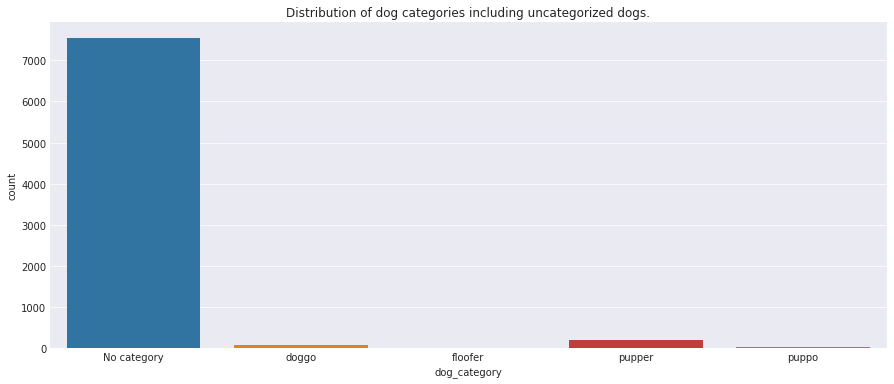

In [175]:
plt.figure(figsize=(15,6))
sns.countplot(x=twitter_archive_master['dog_category'])
plt.title('Distribution of dog categories including uncategorized dogs.');

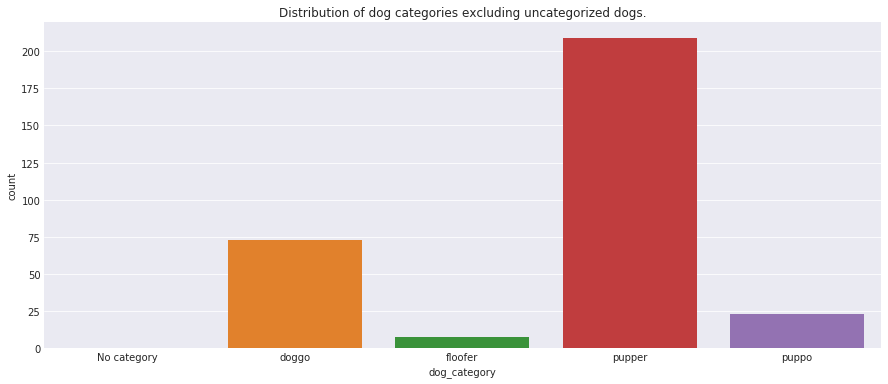

In [176]:
plt.figure(figsize=(15,6))
sns.countplot(x=(twitter_archive_master[twitter_archive_master['dog_category'] != 'No category']['dog_category']))
plt.title('Distribution of dog categories excluding uncategorized dogs.');

In [177]:
twitter_archive_master[['ratings','likes']].corr()

,ratings,likes
ratings,1.000000,0.174768
likes,0.174768,1.000000


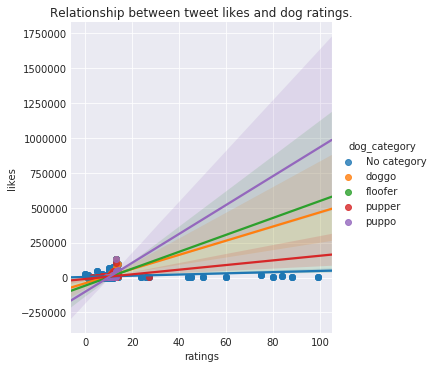

In [178]:
plt.figure(figsize=(15,6))
sns.lmplot(data=twitter_archive_master, x='ratings', y='likes', hue='dog_category')
plt.title('Relationship between tweet likes and dog ratings.');

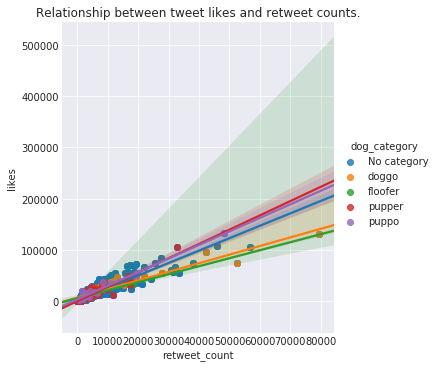

In [179]:
plt.figure(figsize=(15,6))
sns.lmplot(data=twitter_archive_master, x='retweet_count', y='likes', hue='dog_category')
plt.title('Relationship between tweet likes and retweet counts.');

### Conclusion

The data wrangling process was carried out successfully for the relevant data. Different quality and tidiness issues were highlighted, cleaned, and tested using the relevant framework.
Insights were then drawn from the cleaned data which coupled with some drawn up visualizations showed some pretty interesting details. However, it should be noted that the datasets in uestion still had some issues to be corrected, which coupled with appropriate domain knowledge should result in even more impressive and accurate insights.